In [1]:
import matplotlib.pyplot as plt 
import random as rd
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, SVR, LinearSVR, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, SelectFromModel
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from time import sleep
from tqdm import tqdm, trange
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_recall_curve

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df_test = pd.read_csv('../dataset/credit_card_test.csv')
df_train = pd.read_csv('../dataset/credit_card_train.csv')

to_float = ['Annual_Income','Age', 'Changed_Credit_Limit', 'Outstanding_Debt','Monthly_Balance' , 'Num_of_Loan', 'Amount_invested_monthly', 'Num_of_Delayed_Payment']
for col in to_float:
    df_train[col] = df_train[col].apply(lambda x: float(str(x).replace('_', '')) if str(x) != '_' else None)

df_train['Age'] = df_train['Age'].apply(lambda x: x if x >= 18 and x <= 80 else None)
df_train['Num_Credit_Inquiries'] = df_train['Num_Credit_Inquiries'].apply(lambda x: x if x >= 0 and x <= 20 else None)
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].apply(lambda x: x if x >= 0 and x <= 40 else None)
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].apply(lambda x: x if x >= 0 and x <= 10 else None)


df_train.drop(['ID', 'Name', 'SSN', 'Customer_ID'], axis=1, inplace=True)

df_train.dropna(axis=0, inplace=True)

cate_df = df_train.select_dtypes('object')
cont_df = df_train.select_dtypes('float64')

cont_df_y = df_train.select_dtypes('float64')
cont_df_y['Credit_Score'] = df_train['Credit_Score']

df_train

/home/titi/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_17302/552652091.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_df_y['Credit_Score'] = df_train['Credit_Score']


Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan                                       Type_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly                 Payment_Behaviour  Monthly_Balance Credit_Score
0       January  23.0  Scientist       19114.12            1824.843333                  3                4              3          4.0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3                     7.0                 11.27                   4.0          _            809.98                 26.822620   22 Years and 1 Months                    No            49.574949                80.415295   High_spent_Small_value_payments       312.494089         Good
6          July  23.0  Scientist       19114.12            1824.843333                  3                4              3          4.0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3                     8.0                 11.27                   4.0       Good            809.98                 22.537593   22 Years and 7 Months                    No            49.574949               178.344067    Low_spent_Small_value_payments       244.565317         Good
8       January  28.0    _______       34847.84            3037.986667                  2                4              6          1.0                                Credit-Builder Loan                    3                     4.0                  5.42                   2.0       Good            605.03                 24.464031   26 Years and 7 Months                    No            18.816215               104.291825    Low_spent_Small_value_payments       470.690627     Standard
9      February  28.0    Teacher       34847.84            3037.986667                  2                4              6          1.0                                Credit-Builder Loan                    7                     1.0                  7.42                   2.0       Good            605.03                 38.550848   26 Years and 8 Months                    No            18.816215                40.391238   High_spent_Large_value_payments       484.591214         Good
12          May  28.0    Teacher       34847.84            3037.986667                  2                4              6          1.0                                Credit-Builder Loan                    3                     1.0                  6.42                   2.0       Good            605.03                 34.977895  26 Years and 11 Months                    No            18.816215               130.115420    Low_spent_Small_value_payments       444.867032         Good
...         ...   ...        ...            ...                    ...                ...              ...            ...          ...                                                ...                  ...                     ...                   ...                   ...        ...               ...                       ...                     ...                   ...                  ...                      ...                               ...              ...          ...
99994     March  25.0   Mechanic       39628.99            3359.415833                  4                6              7          2.0                        Auto Loan, and Student Loan                   20                     6.0                  9.50                   3.0          _            502.38                 39.323569   31 Years and 5 Months                    No            35.104023               140.581403  High_spent_Medium_value_payments       410.256158         Poor
99995     April  25.0   Mechanic       39628.99            3359.415833                  4                6              7 

In [2]:
df_train.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance
count  48598.000000   4.859800e+04           48598.000000       48598.000000     48598.000000   48598.000000  48598.000000         48598.000000            48598.000000          48598.000000          48598.000000      48598.000000              48598.000000         48598.000000             48598.000000     4.859800e+04
mean      34.070394   1.793278e+05            4072.769530          16.966748        22.714206      75.265196      3.903679            21.660233               13.596033             10.608908              5.952220       1475.698829                 32.238733          1436.704838               623.414434    -3.429496e+22
std        9.945662   1.467945e+06            3127.850419         116.643794       128.813663     476.606818      2.203414            15.117935                6.194688              6.905535              3.901574       1180.349883                  5.064273          8352.491836              2037.642074     3.380934e+24
min       18.000000   7.006035e+03             303.645417          -1.000000         0.000000       1.000000      1.000000            -5.000000                0.000000             -6.480000              0.000000          0.230000                 20.881250             4.462837                 0.000000    -3.333333e+26
25%       26.000000   1.905166e+04            1590.147083           4.000000         4.000000       8.000000      2.000000            10.000000                9.000000              5.430000              3.000000        585.590000                 28.066355            41.074322                72.282772     2.660365e+02
50%       34.000000   3.636762e+04            3006.268333           6.000000         6.000000      15.000000      4.000000            18.000000               14.000000              9.570000              6.000000       1203.570000                 32.264121            78.049660               131.205331     3.277123e+02
75%       42.000000   7.090206e+04            5804.050000           8.000000         7.000000      21.000000      5.000000            29.000000               18.000000             15.280000              9.000000       2065.270000                 36.426268           167.959794               251.859600     4.492881e+02
max       56.000000   2.419806e+07           15204.633333        1798.000000      1499.000000    5789.000000      9.000000            67.000000               28.000000             36.290000             17.000000       4998.070000                 49.564519         82331.000000             10000.000000     1.552946e+03

/home/titi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/titi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/titi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

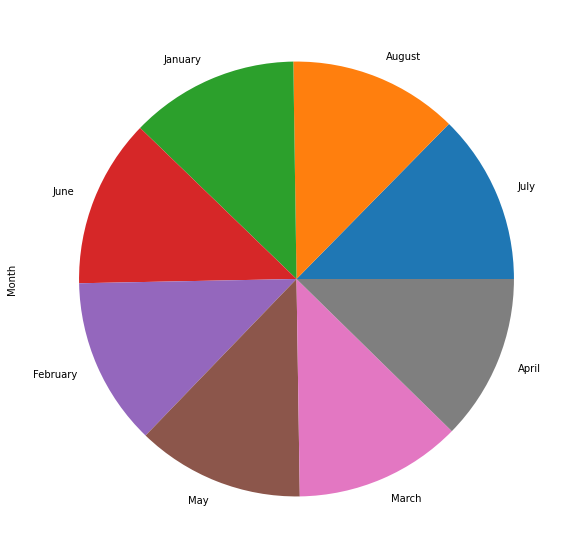

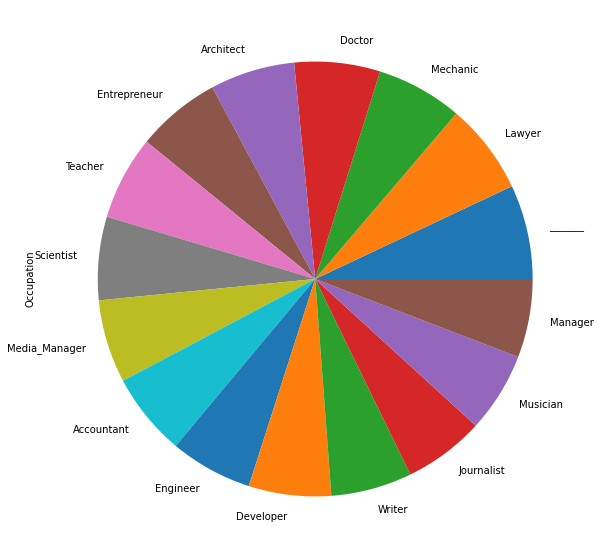

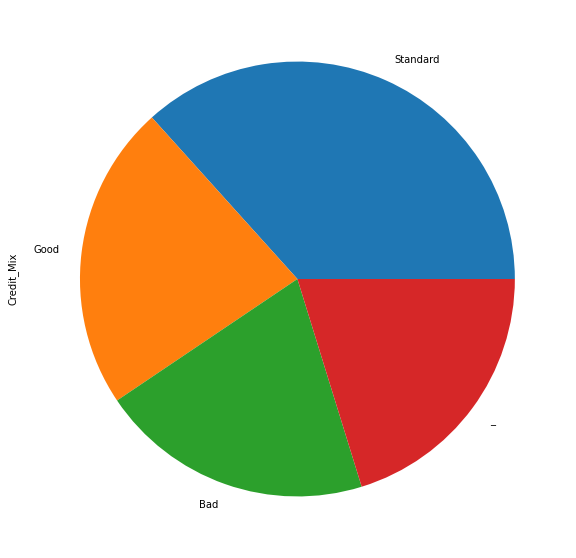

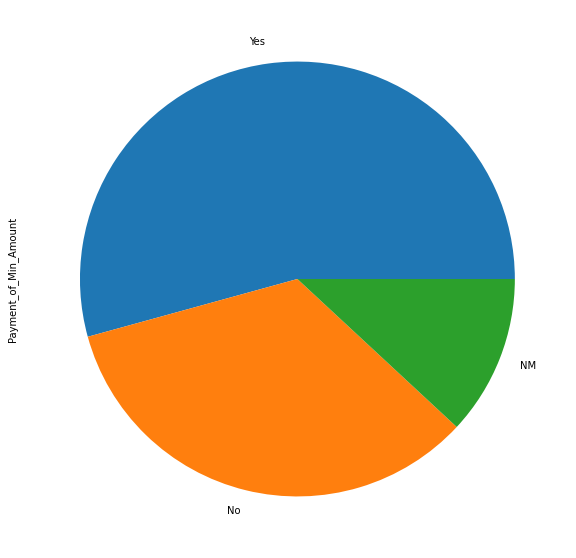

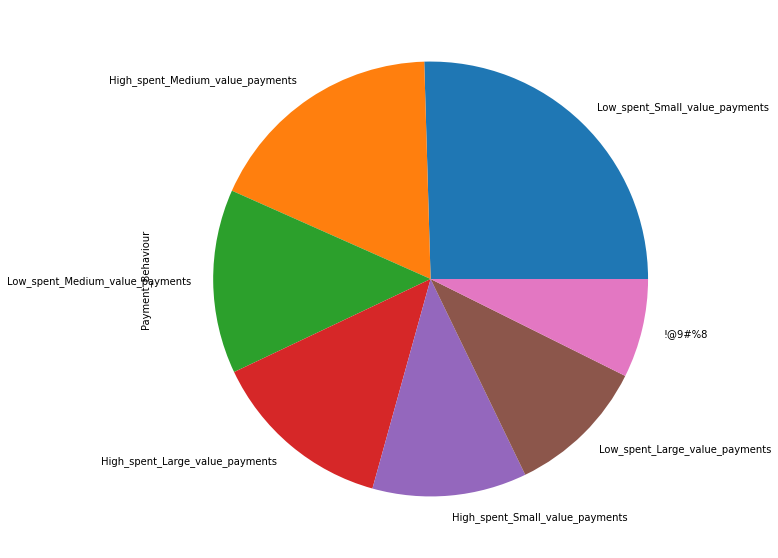

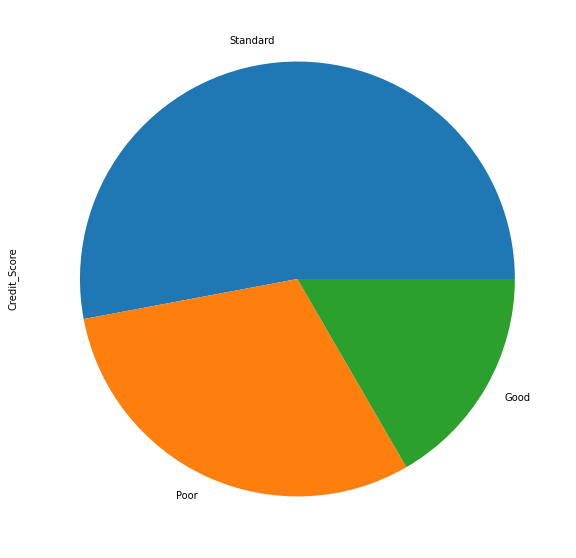

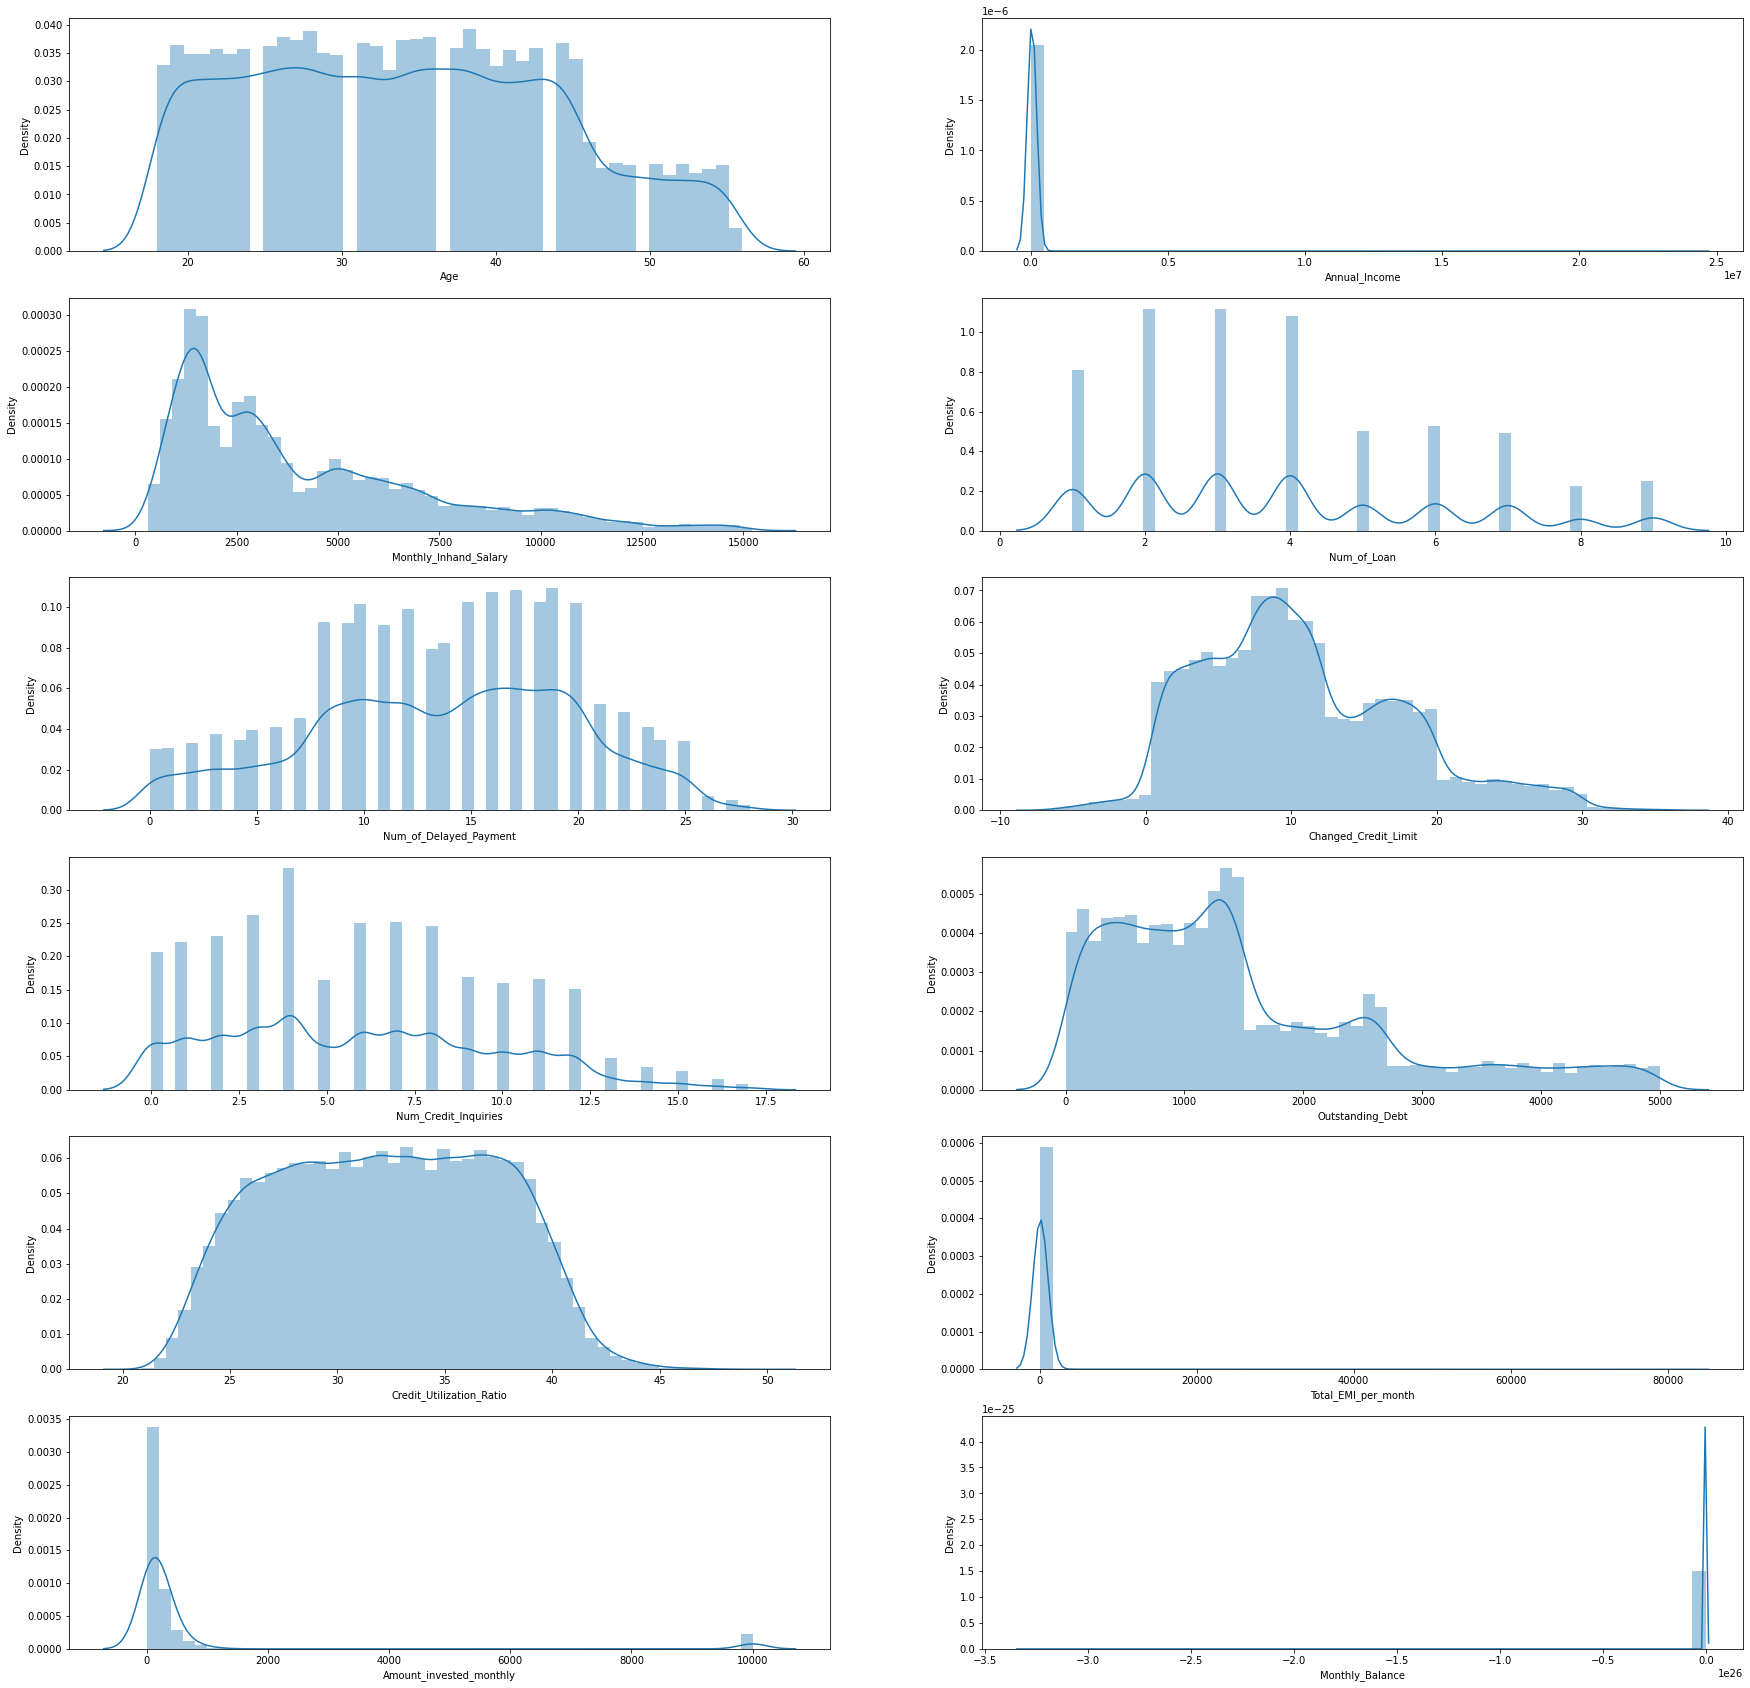

In [3]:
def category_count(dataset):
    for col in dataset.select_dtypes('object'):
        print(f'{col :-<50}{dataset[col].unique()}')

def distributions(row, colum, data): 
    _, ax = plt.subplots(nrows=row, ncols=colum, figsize=(30,30))
    col = data.columns
    index = 0
    for i in range(row):
        for j in range(colum):
            sns.distplot(data[col[index]], ax=ax[i][j])
            index += 1

def category_pie(df, array):
    for col in array:
        plt.figure(figsize=(15,10))
        df[col].value_counts().plot.pie()

columns_cat = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
category_pie(cate_df, columns_cat)
distributions(6,2, cont_df_y)


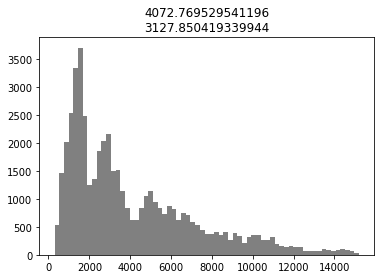

In [4]:
DATA = cont_df['Monthly_Inhand_Salary']
q0, q251 = np.percentile(DATA, [0, 25])
q252, q751 = np.percentile(DATA, [25, 75])
q752, q100 = np.percentile(DATA, [75, 100])
bin_width = 2 * (q751 - q251) * len(DATA) ** (-1/3)
bins = round((DATA.max() - DATA.min()) / bin_width)

plt.figure()
plt.hist(cont_df['Monthly_Inhand_Salary'], bins=bins, color='grey')
plt.title(str(cont_df['Monthly_Inhand_Salary'].mean()) + "\n" +str(cont_df['Monthly_Inhand_Salary'].std()))
plt.show()

In [5]:
cont_df.describe()

Age  Annual_Income  Monthly_Inhand_Salary   Num_of_Loan  Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance
count  48598.000000   4.859800e+04           48598.000000  48598.000000            48598.000000          48598.000000          48598.000000      48598.000000              48598.000000         48598.000000             48598.000000     4.859800e+04
mean      34.070394   1.793278e+05            4072.769530      3.903679               13.596033             10.608908              5.952220       1475.698829                 32.238733          1436.704838               623.414434    -3.429496e+22
std        9.945662   1.467945e+06            3127.850419      2.203414                6.194688              6.905535              3.901574       1180.349883                  5.064273          8352.491836              2037.642074     3.380934e+24
min       18.000000   7.006035e+03             303.645417      1.000000                0.000000             -6.480000              0.000000          0.230000                 20.881250             4.462837                 0.000000    -3.333333e+26
25%       26.000000   1.905166e+04            1590.147083      2.000000                9.000000              5.430000              3.000000        585.590000                 28.066355            41.074322                72.282772     2.660365e+02
50%       34.000000   3.636762e+04            3006.268333      4.000000               14.000000              9.570000              6.000000       1203.570000                 32.264121            78.049660               131.205331     3.277123e+02
75%       42.000000   7.090206e+04            5804.050000      5.000000               18.000000             15.280000              9.000000       2065.270000                 36.426268           167.959794               251.859600     4.492881e+02
max       56.000000   2.419806e+07           15204.633333      9.000000               28.000000             36.290000             17.000000       4998.070000                 49.564519         82331.000000             10000.000000     1.552946e+03

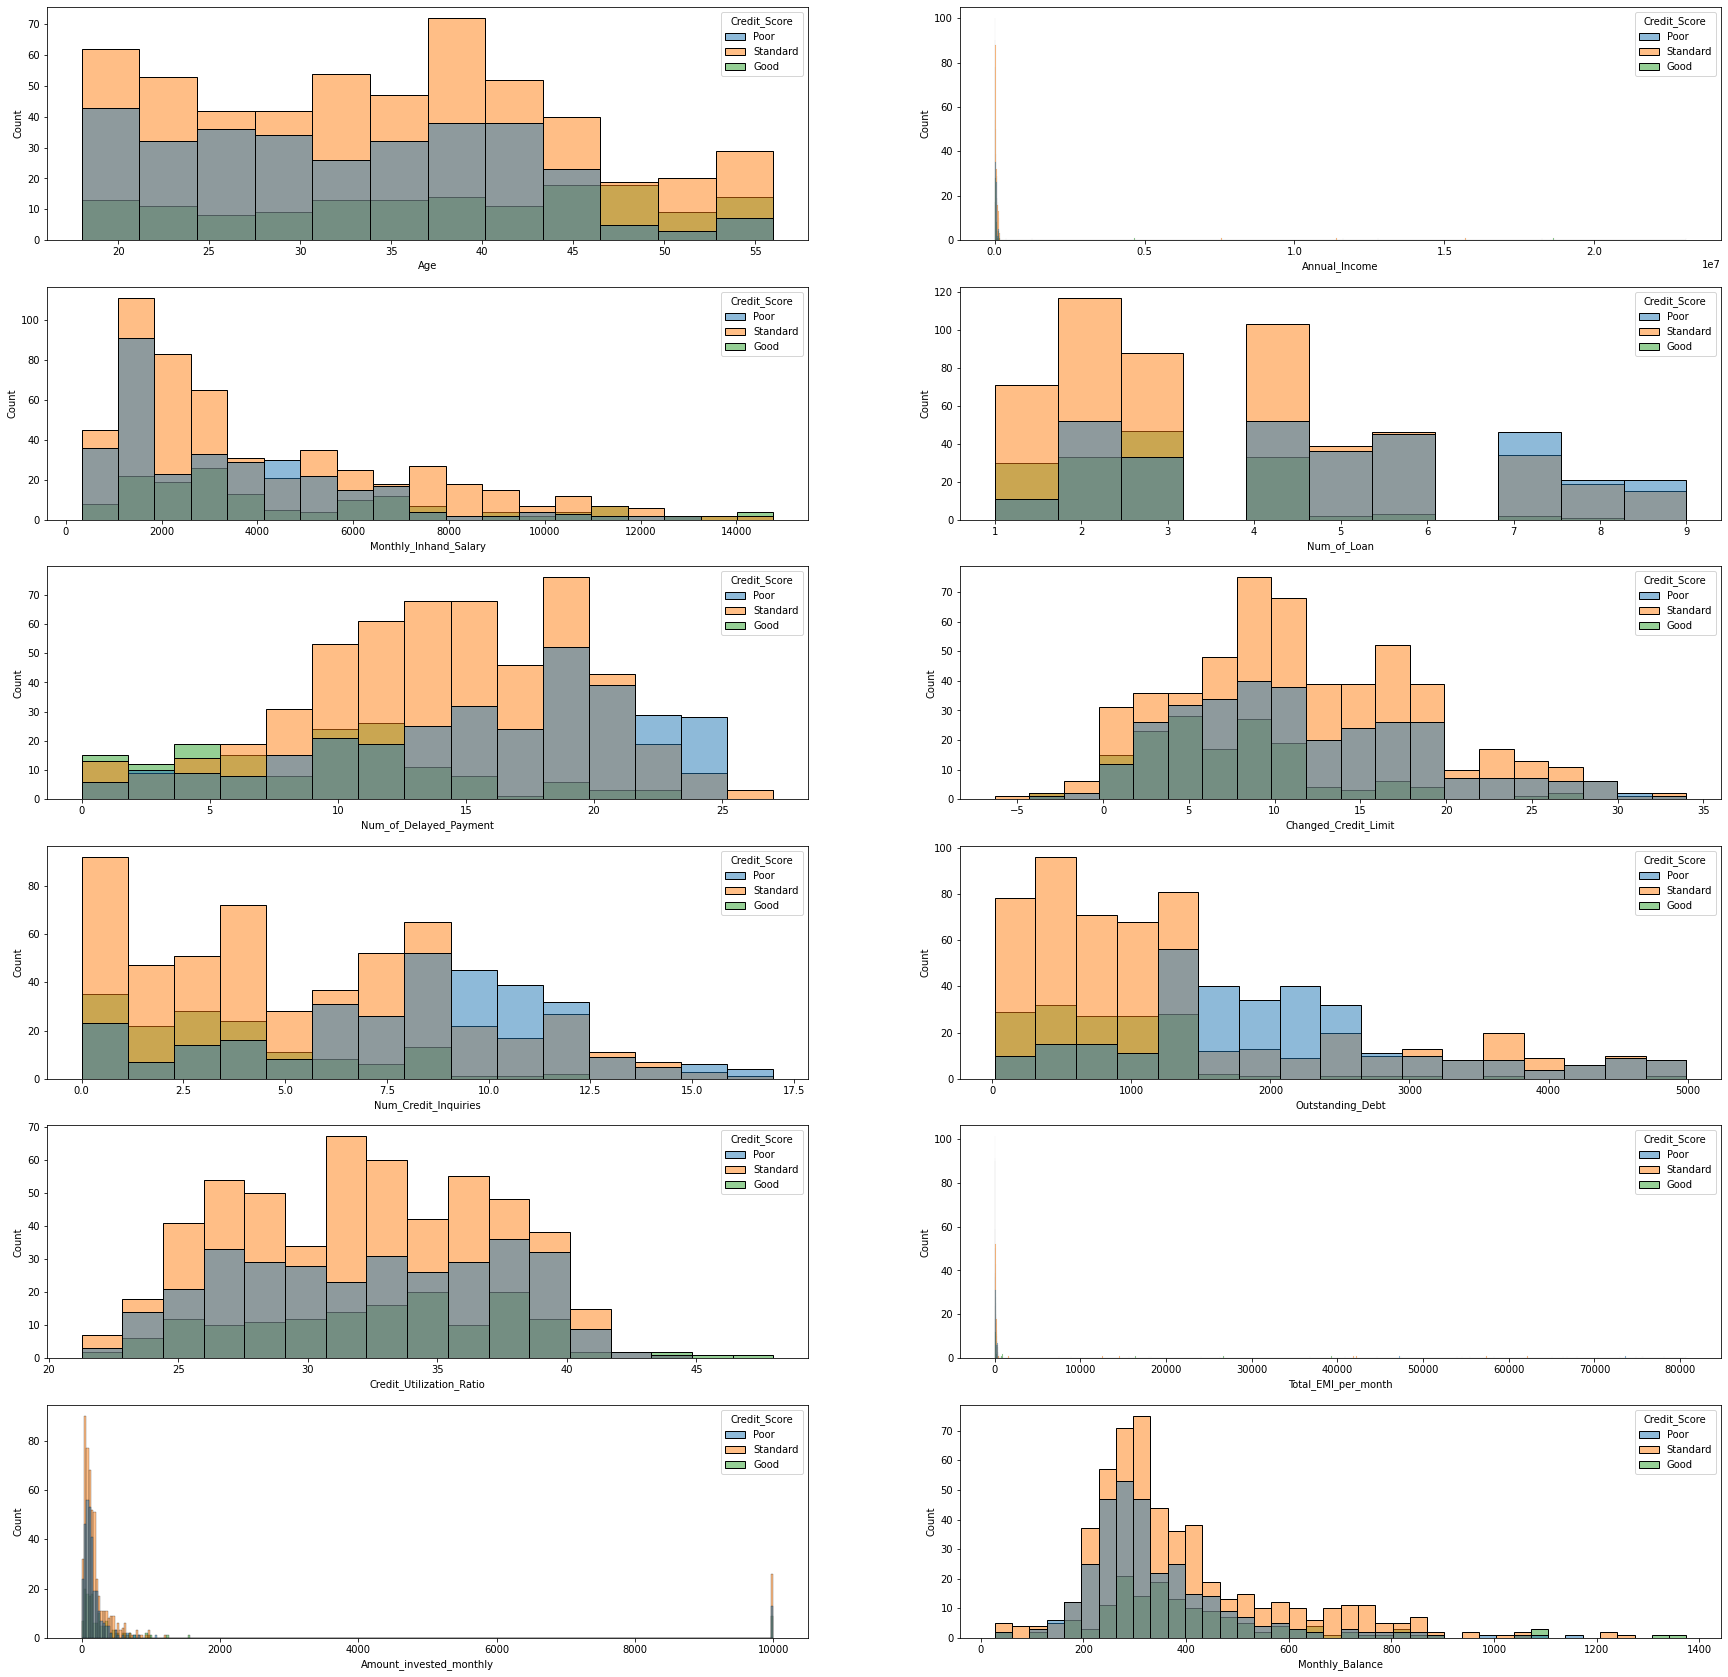

In [6]:
cont_df_y

def distributions(row, colum, data): 
    _, ax = plt.subplots(nrows=row, ncols=colum, figsize=(30,30))
    col = data.columns
    index = 0
    for i in range(row):
        for j in range(colum):
            sns.histplot(data,x=col[index], hue='Credit_Score', ax=ax[i][j])
            index += 1

cont_df_y_sample = cont_df_y.sample(n=1000, random_state=1)
distributions(6,2, cont_df_y_sample)

<AxesSubplot:xlabel='Monthly_Balance', ylabel='Num_Credit_Inquiries'>

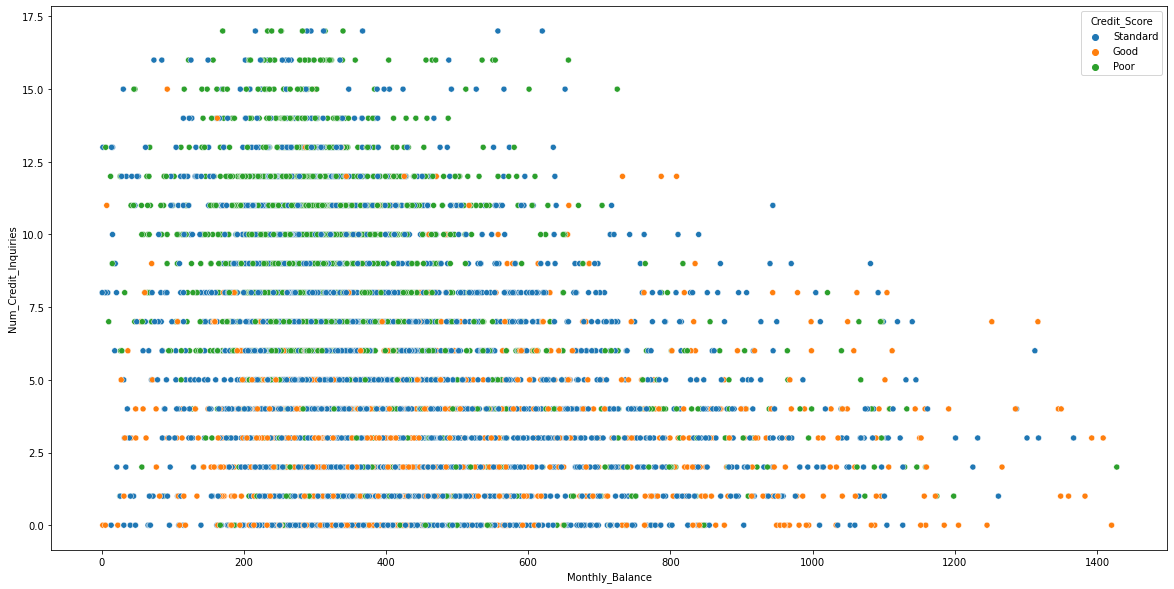

In [8]:
plt.figure(figsize=(20,10))
# sns.histplot(cont_df_y.sample(n=7000), x='Monthly_Balance', hue='Credit_Score', stat="count", element='bars')

sns.scatterplot(x="Monthly_Balance", y="Num_Credit_Inquiries",
             hue="Credit_Score",
             data=cont_df_y.sample(n=7000))